<a href="https://colab.research.google.com/github/mervenurerdogan/BTC-USD_Price-_Prediction_LSTM/blob/main/DollarPricePredict_LSTM(USD_TRY).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt


In [2]:
dollar_path='/content/drive/MyDrive/USD_DATA/USD_DATASET.csv'

In [3]:
data=pd.read_csv(dollar_path, date_parser=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-01,2.659610,2.683620,2.65808,2.659570,2.659570,0.0
1,2015-06-02,2.680820,2.691290,2.67109,2.680820,2.680820,0.0
2,2015-06-03,2.672820,2.690120,2.67163,2.672160,2.672160,0.0
3,2015-06-04,2.684530,2.706000,2.65929,2.684530,2.684530,0.0
4,2015-06-05,2.668580,2.690540,2.65590,2.668820,2.668820,0.0
...,...,...,...,...,...,...,...
1823,2022-05-26,16.348000,16.448601,16.26090,16.348000,16.348000,0.0
1824,2022-05-27,16.360701,16.399401,16.18000,16.360701,16.360701,0.0
1825,2022-05-30,16.334299,16.391331,16.27807,16.334299,16.334299,0.0
1826,2022-05-31,16.383499,16.427059,16.33099,16.383499,16.383499,0.0


In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-01,2.65961,2.68362,2.65808,2.65957,2.65957,0.0
1,2015-06-02,2.68082,2.69129,2.67109,2.68082,2.68082,0.0
2,2015-06-03,2.67282,2.69012,2.67163,2.67216,2.67216,0.0
3,2015-06-04,2.68453,2.70600,2.65929,2.68453,2.68453,0.0
4,2015-06-05,2.66858,2.69054,2.65590,2.66882,2.66882,0.0


In [6]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1823,2022-05-26,16.348000,16.448601,16.26090,16.348000,16.348000,0.0
1824,2022-05-27,16.360701,16.399401,16.18000,16.360701,16.360701,0.0
1825,2022-05-30,16.334299,16.391331,16.27807,16.334299,16.334299,0.0
1826,2022-05-31,16.383499,16.427059,16.33099,16.383499,16.383499,0.0
1827,2022-06-01,16.377729,16.454069,16.36426,16.377729,16.377729,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1828 non-null   object 
 1   Open       1825 non-null   float64
 2   High       1825 non-null   float64
 3   Low        1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Adj Close  1825 non-null   float64
 6   Volume     1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.1+ KB


In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.0
mean,5.818249,5.866712,5.782637,5.818709,5.818709,0.0
std,3.042066,3.087020,3.017117,3.042291,3.042291,0.0
min,2.631230,2.649250,2.627330,2.631320,2.631320,0.0
25%,3.524200,3.538700,3.512900,3.524310,3.524310,0.0
50%,5.432230,5.472980,5.399330,5.432240,5.432240,0.0
75%,7.196720,7.287850,7.124630,7.197080,7.197080,0.0
max,16.603380,18.352301,16.590891,16.608980,16.608980,0.0


In [9]:
data.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1823,False,False,False,False,False,False,False
1824,False,False,False,False,False,False,False
1825,False,False,False,False,False,False,False
1826,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [11]:
data.isnull().sum().sum()

18

In [16]:
# Haftaya bakarak boş olan verileri lineer olarak dolduruyoruz
data.interpolate(method='linear',inplace=True)

In [18]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [19]:
data.isnull().sum().sum()

0

In [20]:
start_date=data.iloc[0][0]
end_date=data.iloc[-1][0]

print('Start_Date',start_date)
print('Finish_Date',end_date)

Start_Date 2015-06-01
Finish_Date 2022-06-01


In [21]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')


In [22]:
data.index=data.Date

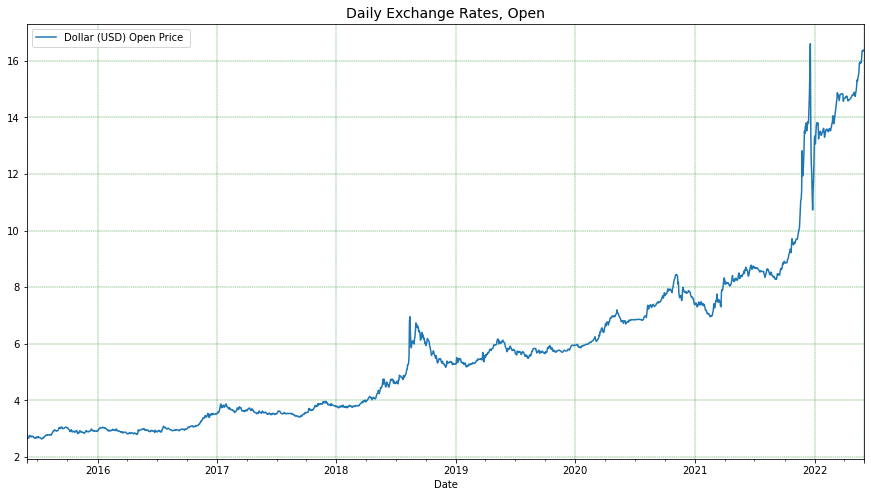

In [26]:
fig = plt.figure(figsize=(15,8))
data.Open.plot(label='Dollar (USD) Open Price ')
plt.legend(loc='best')
plt.title('Daily Exchange Rates, Open', fontsize=14)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.4)
plt.show()

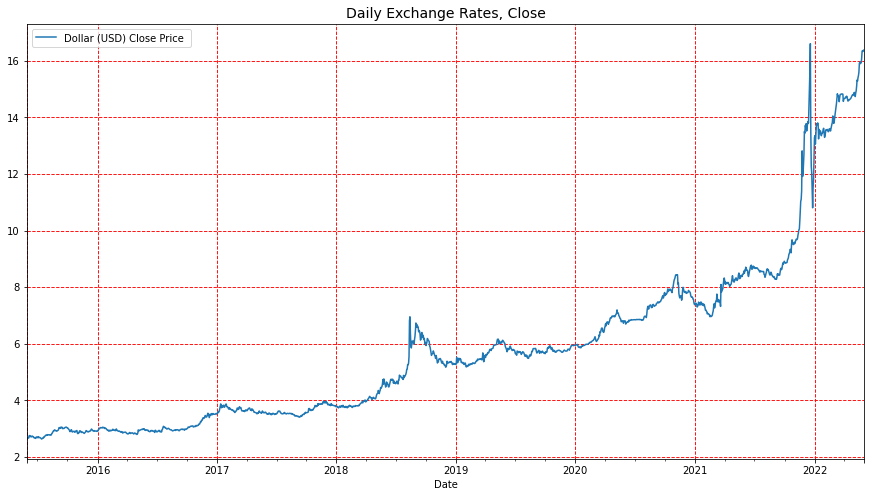

In [27]:
fig = plt.figure(figsize=(15,8))
data.Close.plot(label='Dollar (USD) Close Price ')
plt.legend(loc='best')
plt.title('Daily Exchange Rates, Close', fontsize=14)
plt.grid(color = 'red', linestyle = '--', linewidth = 0.9)
plt.show()

In [28]:
values = data['Open'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(values)

#verilerimizi 0-1 arasında ölçeklendirme yaptık

In [29]:
dataset[0:5]
#ölçeklendirme yapmış olduğumuz verileri kontrol ediyoruz

array([[0.00203118],
       [0.00354919],
       [0.00297663],
       [0.00381471],
       [0.00267316]], dtype=float32)

In [30]:
train_size_rate=0.70 #eğitim için elimizde olan verilerin %70 ını kullanacağız

In [31]:
train_size=int(len(dataset)*train_size_rate)

In [32]:
test_size=len(dataset)-train_size
# toplam veriden eğitim verilerini çıkartıtğımızada geriye kalan %30 lık kısmı test için kullanacağız

In [33]:
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]


In [34]:
print("Veri(Gün Sayısı) Sayıları (training set, test set): " + str((len(train), len(test))))


Veri(Gün Sayısı) Sayıları (training set, test set): (1279, 549)


In [35]:
#verisetini adım,adım okutup daha anlaşılır hale getirmek istiyoruz.
#Asıl amaç son güne bakıp diğer günü tahmin edebilmek
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [36]:
# Verisetlerimizi Oluşturalım
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

Original training data shape:
(1277, 1)


In [37]:
# Yeni verisetinin şekline bakalım.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)
#bu şekilde üç kanal olmasının sebebi model eğitiminde kullanacağımız LSTM yapısından kaynaklanıyor

New training data shape:
(1277, 1, 1)


In [38]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

In [39]:
def fit_model(train_X, train_Y, window_size = 1):
    model = Sequential()
    model.add(LSTM(100,input_shape = (1, window_size)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss = "mean_squared_error",optimizer = "adam")
   #30 epoch yani 30 kere verisetine bakılacak.
    model.fit(train_X, 
              train_Y, 
              epochs = 30, 
              batch_size = 1, 
              verbose = 1)
    
    return(model)

In [40]:
# Fit  model.
model1 = fit_model(train_X, train_Y, window_size)

Epoch 1/30
1277/1277 [==============================] - 6s 4ms/step - loss: 0.0014
Epoch 2/30
1277/1277 [==============================] - 5s 4ms/step - loss: 9.5670e-05
Epoch 3/30
1277/1277 [==============================] - 10s 8ms/step - loss: 9.1494e-05
Epoch 4/30
1277/1277 [==============================] - 10s 8ms/step - loss: 8.1402e-05
Epoch 5/30
1277/1277 [==============================] - 8s 6ms/step - loss: 7.6306e-05
Epoch 6/30
1277/1277 [==============================] - 6s 4ms/step - loss: 7.6441e-05
Epoch 7/30
1277/1277 [==============================] - 4s 3ms/step - loss: 7.2317e-05
Epoch 8/30
1277/1277 [==============================] - 4s 3ms/step - loss: 6.6228e-05
Epoch 9/30
1277/1277 [==============================] - 4s 3ms/step - loss: 6.6382e-05
Epoch 10/30
1277/1277 [==============================] - 4s 3ms/step - loss: 5.8177e-05
Epoch 11/30
1277/1277 [==============================] - 4s 3ms/step - loss: 5.8499e-05
Epoch 12/30
1277/1277 [====================

In [41]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [42]:
import math
def predict_and_score(model, X, Y):
    # Şimdi tahminleri 0-1 ile scale edilmiş halinden geri çeviriyoruz.
    pred = scaler.inverse_transform(model.predict(X))
    orig_data = scaler.inverse_transform([Y])
    # Rmse değerlerini ölçüyoruz.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)


In [43]:
rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)

rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

Training data score: 0.07 RMSE
Test data score: 0.31 RMSE


In [44]:
# Öğrendiklerinini tahminletip ekliyoruz.
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

In [45]:
# Şimdi ise testleri tahminletiyoruz.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

In [74]:
from matplotlib import style
  
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [80]:

import seaborn as sns
import matplotlib.pyplot as plt




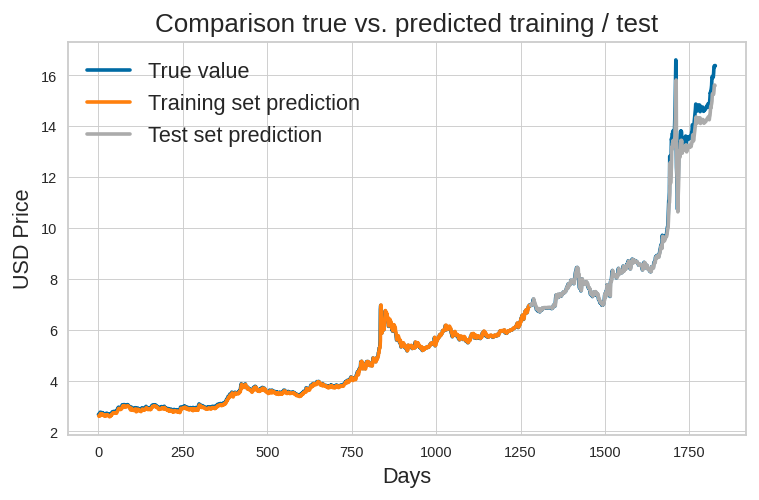

In [95]:

# Plot'u oluşturalım.
plt.figure(dpi=130)
plt.plot(scaler.inverse_transform(dataset), label = "True value")
plt.plot(train_predict_plot, label = "Training set prediction")
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Days",fontsize=12)
plt.ylabel("USD Price",fontsize=12)
plt.title("Comparison true vs. predicted training / test")
plt.legend(prop={"size":12})
plt.show()